In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='whitegrid', font_scale=1.5)

In [2]:
data = pd.read_csv('./Data/augmented_vg_sales.csv')

In [15]:
data

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,System,Generation,platform_creator
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,Console,7,Nintendo
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,Console,3,Nintendo
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,Console,7,Nintendo
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,Console,7,Nintendo
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,Handheld,4,Nintendo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10211,10414,Fairy Tail: Portable Guild,PSP,2010,Fighting,Konami Digital Entertainment,0.00,0.00,0.11,0.00,0.11,Handheld,7,Sony
10212,10415,Champion Jockey: G1 Jockey & Gallop Racer,Wii,2011,Sports,Tecmo Koei,0.05,0.04,0.01,0.01,0.11,Console,7,Nintendo
10213,10416,SimCity 2000,GBA,2003,Simulation,Zoo Digital Publishing,0.08,0.03,0.00,0.00,0.11,Handheld,6,Nintendo
10214,10417,Brunswick Circuit Pro Bowling 2,PS,2000,Sports,THQ,0.06,0.04,0.00,0.01,0.11,Console,5,Nintendo


# Genres

### How have the popularity of genres changed throughout different generations of gaming platforms?

In [3]:
console_data = data.loc[data.System == 'Console', ['Genre','Global_Sales', 'Generation']]
handheld_data = data.loc[data.System == 'Handheld', ['Genre','Global_Sales', 'Generation']]
PC_data = data.loc[data.System == 'PC', ['Genre','Global_Sales', 'Generation']]

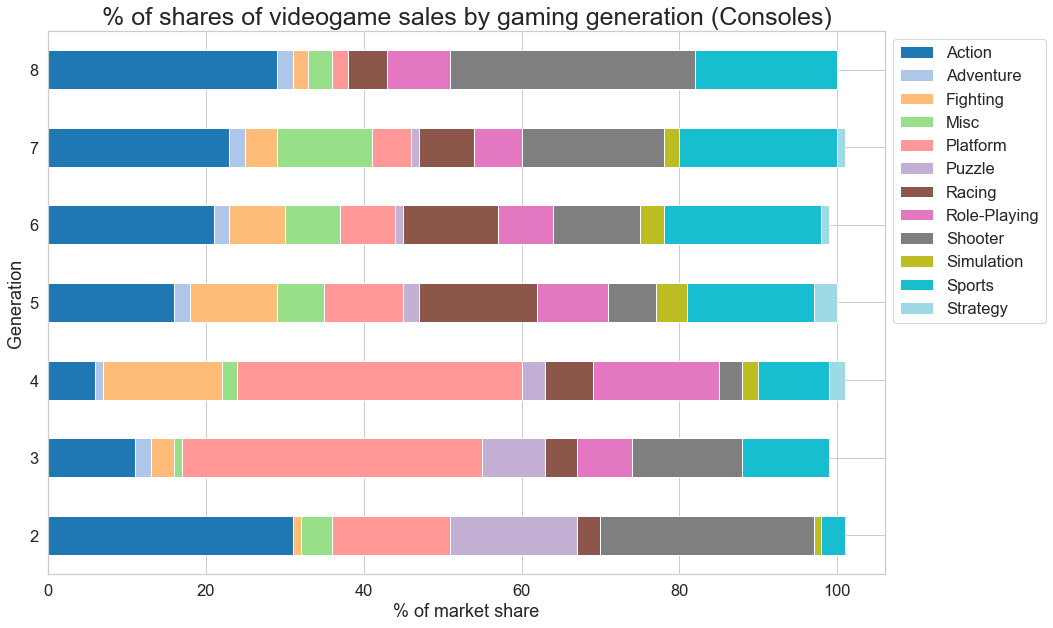

In [4]:
figsize=(15,10)
fontlabels = 20

df = console_data.groupby(['Genre', 'Generation']).Global_Sales.sum().unstack(-1)
ax = (100. * df / df.sum()).round(0).T.plot.barh(rot=0,stacked=True, figsize=figsize,colormap='tab20')

ax.set_title('% of shares of videogame sales by gaming generation (Consoles)',fontsize=25)
ax.set_xlabel('% of market share')
ax.legend(bbox_to_anchor=(1, 1), loc=2);

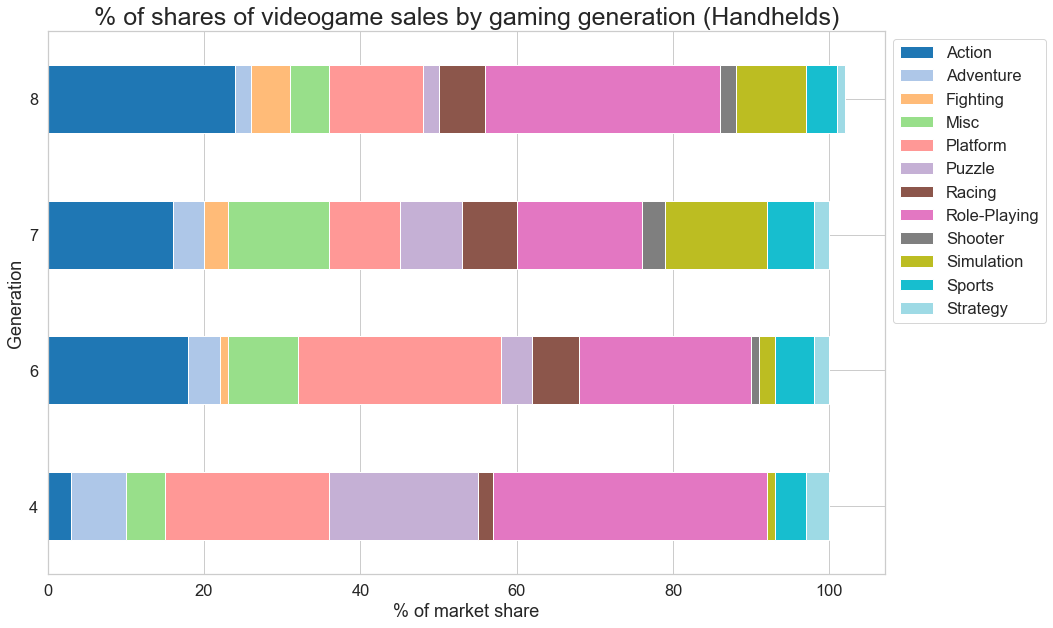

In [5]:
figsize=(15,10)
fontlabels = 20

df = handheld_data.groupby(['Genre', 'Generation']).Global_Sales.sum().unstack(-1)
ax = (100. * df / df.sum()).round(0).T.plot.barh(rot=0,stacked=True, figsize=figsize,colormap='tab20')

ax.set_title('% of shares of videogame sales by gaming generation (Handhelds)',fontsize=25)
ax.set_xlabel('% of market share')
ax.legend(bbox_to_anchor=(1, 1), loc=2);

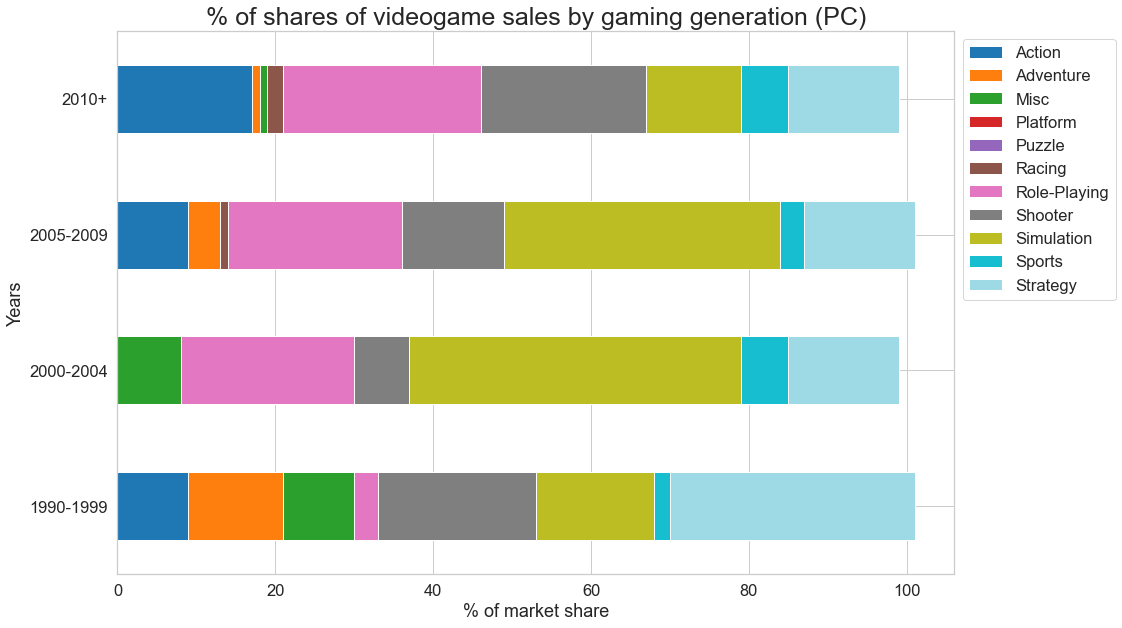

In [6]:
figsize = (15,10)
fontlabels = 20

df = PC_data.groupby(['Genre', 'Generation']).Global_Sales.sum().unstack(-1)
ax = (100. * df / df.sum()).round(0).T.plot.barh(rot=0,stacked=True, figsize=figsize,colormap='tab20')

ax.set_title('% of shares of videogame sales by gaming generation (PC)',fontsize=25)
ax.set_xlabel('% of market share')
ax.set_ylabel('Years')
ax.set_yticklabels(['1990-1999', '2000-2004', '2005-2009', '2010+'])
ax.legend(bbox_to_anchor=(1, 1), loc=2);

# Publishers

### What are the top 25 most prolific Publishers?

In [11]:
no_games_published = data.Publisher.value_counts().rename_axis('Publisher').rename('Titles_Published')
top_25 = no_games_published.head(25)
top_25.to_frame()

,Titles_Published
Publisher,
Electronic Arts,1149
Activision,771
Ubisoft,650
Nintendo,628
THQ,584
Sony Computer Entertainment,553
Namco Bandai Games,504
Konami Digital Entertainment,495
Sega,438


## Among these, which sell more games on average per title?

In [12]:
global_sales_publisher = data[data.Publisher.isin(top_25.index)].groupby('Publisher').Global_Sales.sum()

titles_sold_published = pd.concat([top_25, global_sales_publisher],axis=1)

titles_sold_published['sold_per_published_mils'] = (titles_sold_published.Global_Sales) / titles_sold_published.Titles_Published

In [19]:
titles_sold_published.sort_values(['sold_per_published_mils'], ascending=False)

,Titles_Published,Global_Sales,sold_per_published_mils
Nintendo,628,1780.42,2.835064
Microsoft Game Studios,140,243.15,1.736786
Take-Two Interactive,319,393.64,1.233981
LucasArts,74,84.00,1.135135
Sony Computer Entertainment,553,599.75,1.084539
Electronic Arts,1149,1082.79,0.942376
Activision,771,709.86,0.920700
Square Enix,182,142.21,0.781374
Capcom,249,193.50,0.777108
Eidos Interactive,124,93.04,0.750323


## Amongst these, which are the most consistent in terms of sales per published game?

In [22]:
publisher = data[data.Publisher.isin(top_25.index)].groupby('Publisher').Global_Sales.std().sort_values(ascending=True).index
titles_sold_published.reindex(index = publisher)

,Titles_Published,Global_Sales,sold_per_published_mils
Publisher,,,
Tecmo Koei,143,44.23,0.309301
D3Publisher,68,19.45,0.286029
Codemasters,91,45.05,0.495055
Midway Games,142,66.09,0.465423
Acclaim Entertainment,138,61.56,0.446087
Namco Bandai Games,504,231.92,0.460159
Disney Interactive Studios,189,117.38,0.621058
THQ,584,332.34,0.569075
Vivendi Games,111,54.31,0.489279


# System Manufacturers

## Among System Manufacturers, what trends can be seen in terms of video games sold for their system?

In [8]:
sales_data_yearly = data.groupby(['platform_creator', 'Year']).Global_Sales.sum().unstack().T

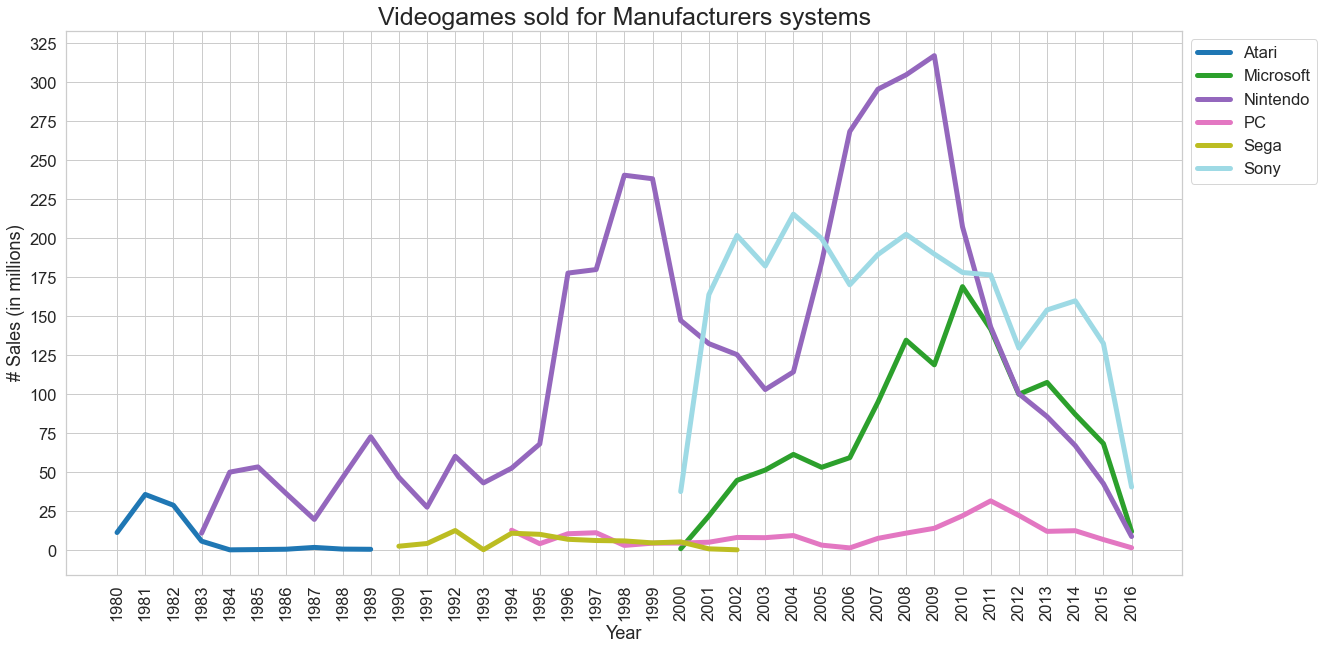

In [28]:
figsize = (20,10)
fontlabels = 20

ax = sales_data_yearly.plot(figsize=figsize,colormap='tab20',lw=5)

ax.set_title('Videogames sold for Manufacturers systems',fontsize=25)
ax.set_ylabel('# Sales (in millions)')
ax.set_yticks(range(0, 350,25))
ax.set_xticks([x for x in sales_data_yearly.index])
ax.set_xticklabels(ax.get_xticks(), rotation = 90)
ax.legend(bbox_to_anchor=(1, 1), loc=2);